In [1]:
# pip install nltk
# pip install lazypredict
# pip install seaborn
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('graphviz')
import random
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import re
import string
from nltk.metrics import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
import sys
from nltk import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
import string
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist
import statistics
import numpy as np 
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import pandas as pd
from lazypredict.Supervised import LazyClassifier
import os
import nltk
from nltk.tokenize import sent_tokenize, RegexpTokenizer

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/abby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/abby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading graphviz: Package 'graphviz' not found in
[nltk_data]     index


Inport date and put in string

In [2]:
# Define the paths to the two directories
original_dir = r"./DataSet2/benchmark_set/human-written"
generated_dir = r"./DataSet2/benchmark_set/ai-generated"

# Get the files for the original
original_file_ids = [file_id for file_id in os.listdir(original_dir) if file_id.endswith(".txt")]
file_original = []
for file_id in original_file_ids:
    file_path = os.path.join(original_dir, file_id)
    #print(f"Reading original file: {file_path}")  # Print file path for debugging
    with open(file_path, 'r', encoding='utf-8') as file:
        file_original.append((file.read(), "org"))  # Tuple with text and class "org"

# Get the files for the generated
generated_file_ids = [file_id for file_id in os.listdir(generated_dir) if file_id.endswith(".txt")]
file_generated = []
for file_id in generated_file_ids:
    file_path = os.path.join(generated_dir, file_id)
    #print(f"Reading generated file: {file_path}")  # Print file path for debugging
    with open(file_path, 'r', encoding='utf-8') as file:
        file_generated.append((file.read(), "gen"))  # Tuple with text and class "gen"

# Check if there are overlapping file IDs between the two directories
if set(original_file_ids).intersection(set(generated_file_ids)):
    print("Warning: There are overlapping file IDs between original and generated data.")
else:
    print("No overlapping file IDs between original and generated data.")

# Merge the files into one string
merged_original = '{*%*}'.join([text for text, _ in file_original])
merged_generated = '{*%*}'.join([text for text, _ in file_generated])

# Combine the data from both classes
documents = file_original + file_generated
print(len(documents))

2001


Turn string into into tokenized words

In [3]:
# Get as words
all_words = []
short_org_words = word_tokenize(merged_original)
short_gen_words = word_tokenize(merged_generated)

for w in short_org_words:
    all_words.append(w.lower())
for w in short_gen_words:
    all_words.append(w.lower())

print("Length of Human Data:", len(short_org_words)) # Number of words
print("Length of Generated Data:", len(short_gen_words)) # Number of words
print("All data size: ", len(all_words))    # Todal number of words
print("=====")

Length of Human Data: 669386
Length of Generated Data: 404577
All data size:  1073963
=====


In [4]:
def clean(text, punF, numF, stopF):
    # remove numbers
    if numF == 1:
        text = re.sub(r'\d+', '', text)
    # remove punctuations
    if punF == 1:
        text = "".join([char for char in text if char not in string.punctuation]) 
    # remove stop words
    if stopF == 1:
        stop_words = set(stopwords.words('english'))
        text = [w for w in word_tokenize(text) if w.lower() not in stop_words]
        text = ' '.join(text)  # Join the list of words into a single string
    return text

# output = [clean(word,1,1,1) for word in all_words]
# print("Cleaned data size: ",len((all_words))) # Number of cleaned words

In [5]:
def find_selected_stats_names(control):
    # Feature descriptions
    feature_descriptions = [
        "sentences per paragraph",
        "words per paragraph",
        "Number of occurrences of ')'",
        "Number of occurrences of '-'",
        "Number of occurrences of ';'",
        "Number of occurrences of '?'",
        "Number of occurrences of '''",
        "Sentence STD",
        "Length difference for consecutive sentences",
        "Sentence with <11 words",
        "Sentence with >34 words",
        "Number of occurrences of 'although'",
        "Number of occurrences of 'However'",
        "Number of occurrences of 'but'",
        "Number of occurrences of 'because'",
        "Number of occurrences of 'this'",
        "Number of occurrences of ‘others’ or ‘researchers’",
        "Count of numbers in the document",
        "Contains 2 times more capitals than periods",
        "Number of occurrences of 'et'",
        "Sentence Mean"
    ]

    # Filter selected features based on control values
    selected_features = [f"{i + 1} - {feature}" for i, feature in enumerate(feature_descriptions) if control[i] == 1]
    info_str = "\n".join(selected_features)

    return info_str

def find_all_stats_names():
    # Feature descriptions
    feature_descriptions = [
        "sentences per paragraph",
        "words per paragraph",
        "Number of occurrences of ')'",
        "Number of occurrences of '-'",
        "Number of occurrences of ';'",
        "Number of occurrences of '?'",
        "Number of occurrences of '''",
        "Sentence STD",
        "Length difference for consecutive sentences",
        "Sentence with <11 words",
        "Sentence with >34 words",
        "Number of occurrences of 'although'",
        "Number of occurrences of 'However'",
        "Number of occurrences of 'but'",
        "Number of occurrences of 'because'",
        "Number of occurrences of 'this'",
        "Number of occurrences of ‘others’ or ‘researchers’",
        "Count of numbers in the document",
        "Contains 2 times more capitals than periods",
        "Number of occurrences of 'et'",
        "Sentence Mean"
    ]

    # Construct the information string for all features
    all_features = [f"{i + 1} - {feature}" for i, feature in enumerate(feature_descriptions)]
    info_str = "\n".join(all_features)

    return info_str

def ControlerEx(RunName,case_Type, case_BoolTF, control, TestingOutput):
    print(RunName)
    print('====================')
    # Map case_Type and case_BoolTF to their meanings
    case_type_mapping = {1: 'Words', 2: 'Type', 3: 'BiGram Words', 4: 'BiGram Type'}
    case_bool_mapping = {1: 'Boolean', 2: 'Counts', 3: 'just'}

    # Get the meanings for case_Type and case_BoolTF
    case_type_meaning = case_type_mapping.get(case_Type, 'Unknown')
    case_bool_meaning = case_bool_mapping.get(case_BoolTF, 'Unknown')

    # Check if all values in control are zero
    if all(value == 0 for value in control):
        print(f"You are using {case_bool_meaning} {case_type_meaning}")
    elif (case_BoolTF == 3):
        # Construct the information string with feature details
        info_str = f"You are using {case_bool_meaning} selected features:\n"
        info_str += find_selected_stats_names(control)
        # Print the information string
        print(info_str)
    else:
        # Construct the information string with feature details
        info_str = f"You are using {case_bool_meaning} {case_type_meaning} and selected features:\n"
        info_str += find_selected_stats_names(control)

        # Print the information string
        print(info_str)

    # If TestingOutput is True, print the full table
    if TestingOutput:
        print("\n====================\n")
        print("Selected features table:")
        print(find_all_stats_names())


In [6]:
RunName = 'test1'
# 1 - Words, 2 - Type, 3 - BiGram Words, 4 - BiGram Type
case_Type = 1
# 1 - Boolean, 2 - Counts, 3 - Just feature set
case_BoolTF = 3

# Feachure set for report
control = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]#[1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1]
# Are you running in testing mode
TestingOutput = False
ControlerEx(RunName,case_Type,case_BoolTF,control,TestingOutput)

test1
You are using just selected features:
1 - sentences per paragraph
2 - words per paragraph
3 - Number of occurrences of ')'
4 - Number of occurrences of '-'
5 - Number of occurrences of ';'
6 - Number of occurrences of '?'
7 - Number of occurrences of '''
8 - Sentence STD
9 - Length difference for consecutive sentences
10 - Sentence with <11 words
11 - Sentence with >34 words
12 - Number of occurrences of 'although'
13 - Number of occurrences of 'However'
14 - Number of occurrences of 'but'
15 - Number of occurrences of 'because'
16 - Number of occurrences of 'this'
17 - Number of occurrences of ‘others’ or ‘researchers’
18 - Count of numbers in the document
19 - Contains 2 times more capitals than periods
20 - Number of occurrences of 'et'
21 - Sentence Mean


Make Features

In [7]:
#case_Type = 1

if case_Type == 1:
    # Set up functions
    def find_features_count(document,word_features):
        words = document.split()
        features = {}
        for w in word_features:
            features[w] = words.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features

    #Clean Words
    cleaned_words = [clean(word,1,1,1) for word in all_words]
    # Pulling feachures
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = cleaned_words
    print("Using Words")
    
elif case_Type == 2:
    # Set up functoins 
    def find_features_count(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        features = {}
        for w in word_features:
            features[w] = document.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features
    
    #Clean Words
    cleaned_words = [clean(word,1,1,1) for word in all_words]
    # Pulling feachures
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = nltk.pos_tag(cleaned_words)
    all_fetr = [pos_tag for (word, pos_tag) in all_fetr]
    print("Using Word's Type")

elif case_Type == 3:
    # Function to generate n-grams
    def find_features_count(document,word_features):
        foo = word_tokenize(document[:])
        document = list(bigrams(foo))
        features = {}
        for w in word_features:
            features[w] = document.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        foo = word_tokenize(document[:])
        document = list(bigrams(foo))
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features
    
    #Clean Words
    cleaned_words = [clean(word,0,0,0) for word in all_words]
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = list(bigrams(cleaned_words[:]))
    print("Using BiGram for Word")

elif case_Type == 4:
    # Function to generate n-grams
    def find_features_count(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        #foo = word_tokenize(document[:])
        document = list(bigrams(document))
        features = {}
        for w in word_features:
            features[w] = document.count(w)
        return features
    
    def find_features_boolean(document,word_features):
        foo = nltk.pos_tag(word_tokenize(document))
        document = [pos_tag for (word, pos_tag) in foo]
        #foo = word_tokenize(document[:])
        document = list(bigrams(document))
        words = set(document)
        features = {}
        for w in word_features:
            features[w] = (w in words)
        return features
    
    #Clean Words
    cleaned_words = [clean(word,0,0,0) for word in all_words]
    if(TestingOutput == True):
        print("All data size: ", len((all_words)))
        print("Cleaned data size: ", len((cleaned_words)))
    all_fetr = nltk.pos_tag(cleaned_words)
    all_fetr = [pos_tag for (word, pos_tag) in all_fetr]
    all_fetr = list(bigrams(all_fetr[:]))
    print("Using BiGram for Type")
else:
    print("case_value out of bounds")
if(TestingOutput == True):
    if (case_Type < 5):
        print(all_fetr[:15])
all_fetr = nltk.FreqDist(all_fetr)

Using Words


In [8]:
def find_features_stats(document, control):
        # Set Up
        sentences = sent_tokenize(document)
        tokenizer = RegexpTokenizer(r'\w+')
        sentence_lengths = [len(tokenizer.tokenize(sentence)) for sentence in sentences]
        #sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]
        paragraphs = document.split('\n\n') 
        features = {}
        #print(sentence_lengths)

        # sentences per paragraph
        if control[0] == 1:
            sent_per_paragraph = [len(sent_tokenize(paragraph)) for paragraph in paragraphs]
            mean_sent_per_paragraph = np.mean(sent_per_paragraph)
            features['Sentences per paragraph'] = mean_sent_per_paragraph

        # words per paragraph
        if control[1] == 1:
            words_per_paragraph = [len(word_tokenize(paragraph)) for paragraph in paragraphs]
            mean_words_per_paragraph = np.mean(words_per_paragraph)
            features['Words per paragraph'] = mean_words_per_paragraph

        # Number of occurrences of ')'
        if control[2] == 1:
            var = document.count(')')
            features['Number of occurrences of )'] = var

        # Number of occurrences of '-'
        if control[3] == 1:
            var = document.count('-')
            features['Number of occurrences of -'] = var

        # Number of occurrences of ';'
        if control[4] == 1:
            var = document.count(';')
            features['Number of occurrences of ;'] = var
        
        # Number of occurrences of '?'
        if control[5] == 1:
            var = document.count('?')
            features['Number of occurrences of ?'] = var
            
        # Number of occurrences of '''
        if control[6] == 1:
            var = document.count('\'')
            features['Number of occurrences of \''] = var

        # Sentence STD
        if control[7] == 1:
            std_dev = np.std(sentence_lengths) # Sample STD
            features['Sentence STD'] = std_dev

        # Length difference for consecutive sentences
        if control[8] == 1:
            length_diff = [sentence_lengths[i] - sentence_lengths[i - 1] for i in range(1, len(sentence_lengths))]
            # Add mean length difference as a feature if there is a valid denominator
            if len(length_diff) > 0:
                mean_length_diff = np.mean(length_diff)
                features['Length difference for consecutive sentences'] = mean_length_diff
            else:
                # Handle the case when there is no valid denominator (e.g., only one sentence)
                features['Length difference for consecutive sentences'] = 0.0  # Set a default value or choose an appropriate handling
        # Sentence with <11 words
        if control[9] == 1:
            # Count sentences with <11 words
            short_sentences = [sentence for sentence in sentence_lengths if sentence < 11]
            num_short_sentences = len(short_sentences)
            # Add the count as a feature
            features['Sentence with <11 words'] = num_short_sentences

        # Sentence with >34 words
        if control[10] == 1:
            # Count sentences with <11 words
            short_sentences = [sentence for sentence in sentence_lengths if sentence > 34]
            num_short_sentences = len(short_sentences)
            # Add the count as a feature
            features['Sentence with >34 words'] = num_short_sentences

        # Number of occurrences of 'although'
        if control[11] == 1:
            var = document.count('although')
            features['Number of occurrences of although'] = var

        # Number of occurrences of 'However'
        if control[12] == 1:
            var = document.count('However')
            features['Number of occurrences of However'] = var

        # Number of occurrences of 'but'
        if control[13] == 1:
            var = document.count('but')
            features['Number of occurrences of but'] = var

        # Number of occurrences of 'because'
        if control[14] == 1:
            var = document.count('because')
            features['Number of occurrences of because'] = var

        # Number of occurrences of 'this'
        if control[15] == 1:
            var = document.count('this')
            features['Number of occurrences of this'] = var

        # Number of occurrences of ‘others’ or ‘researchers’
        if control[16] == 1:
            var = document.lower().count('others') + document.lower().count('researchers')
            features['Number of occurrences of others or researchers'] = var
        
        # Count of numbers in the document
        if control[17] == 1:
            numbers = re.findall(r'\b\d+\b', document)  # Using regex to find all numbers
            count_numbers = len(numbers)
            features['Count of numbers in the document'] = count_numbers

        # Contains 2 times more capitals than periods
        if control[18] == 1:
            count_capitals = sum(1 for char in document if char.isupper())
            count_periods = document.count('.')
            
            if count_periods > 0 and count_capitals >= 2 * count_periods:
                features['Contains 2 times more capitals than periods'] = 1
            else:
                features['Contains 2 times more capitals than periods'] = 0

        # Number of occurrences of 'et'
        if control[19] == 1:
            var = document.count('et')
            features['Number of occurrences of et'] = var

        # Sentence Mean
        if control[20] == 1:
            mean_length = np.mean(sentence_lengths)
            features['Sentence Mean'] = mean_length
        
        
        return features

In [9]:
if TestingOutput == True:
    # Sample document
    sample_document = """
    This is a sample document. It contains multiple sentences and paragraphs. 
    It also has some punctuation marks like ?, -, and ;. Additionally, it has some special words like although, However, but, because, this, and et.
    It also includes numbers like 123 and 456. There may be some sentences with more than 34 words and some with less than 11 words. 
    Others may have a length difference for consecutive sentences. 
    """

    # Sample control list
    sample_control = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

    # Test the function
    result = find_features_stats(sample_document, sample_control)

    # Print the result
    for key, value in result.items():
        print(f"{key}: {value}")

Pull feachures

In [10]:
# Get Feature set
#case_BoolTF = 1
#control = [1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,1]

if case_BoolTF == 1:
    # Creat traing and testing split
    FCount = int(len(set(all_fetr))/1)
    word_features = list(all_fetr.keys())[:FCount]
    featuresets = [({**find_features_stats(text, control), **find_features_boolean(text, word_features)}, category) for (text, category) in documents]
    print("Using True/False")
elif case_BoolTF == 2:
    # Creat traing and testing split
    FCount = int(len(set(all_fetr))/1)
    word_features = list(all_fetr.keys())[:FCount]
    featuresets = [({**find_features_stats(text, control), **find_features_count(text, word_features)}, category) for (text, category) in documents]
    print("Using Count")
elif case_BoolTF == 3:
    featuresets = [(find_features_stats(text,control), category) for (text, category) in documents]
    print("Using Stats")
else:
    print(f"Invalid case value: {case_BoolTF}")
random.shuffle(featuresets)
if(TestingOutput == True):
        print(featuresets[:2])

Using Stats


Make training/test slipt

In [11]:
from sklearn.impute import SimpleImputer
#TestingOutput = True
# Get testing/training data set
Trainn = round(len(featuresets)*.75)
training_set = featuresets[:Trainn]
testing_set = featuresets[-(len(featuresets)-Trainn):]

if(TestingOutput == True):
    # Print the number of elements in each set
    print("Number of elements in training_set:", len(training_set))
    print("Number of elements in testing_set:", len(testing_set))
    print("Check they add up: ",(len(testing_set)+len(training_set)))

# Convert features to a numerical format using DictVectorizer
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform([features for (features, label) in training_set])
y_train = np.array([label for (features, label) in training_set])

X_test = vectorizer.transform([features for (features, label) in testing_set])
y_test = np.array([label for (features, label) in testing_set])

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data

# Fit and transform the training data
X_train_imputed = X_train

# Fit and transform the testing data
X_test_imputed = X_test

if(TestingOutput == True):
    print("====================")
    # Training set size
    training_set_size = X_train.size + y_train.size
    print(f"Training Set Size: {training_set_size}")
    print(f"X_train Size: {X_train.shape}")
    print(f"y_train Size: {y_train.shape}")

    # Testing set size
    testing_set_size = X_test.size + y_test.size
    print(f"Testing Set Size: {testing_set_size}")
    print(f"X_test Size: {X_test.shape}")
    print(f"y_test Size: {y_test.shape}")

In [12]:
if(TestingOutput == True):
    # Check that trainging/testing sets are difrent
    print("Train     -   Test")
    for i in range(5):
        se = 0
        for key in testing_set[i][0].keys():
            se = se + testing_set[i][0][key]
        TestStr = (str(se)+' '+testing_set[i][1])
        sr = 0
        for key in training_set[i][0].keys():
            sr = sr + training_set[i][0][key]
        TranStr = (str(sr)+' '+training_set[i][1])
        print(TranStr, "  -  ",TestStr)

    # Assuming testing_set is a list of tuples
    features1, category1 = training_set[7]
    features2, category2 = training_set[8]
    if features1 == features2:
        print("Features of the elements are the same***")
    else:
        print("Features of the elements are different.")
    print("Features set 1:", features1)
    print("Features set 2:", features2)

Run lazy classifier

In [13]:
if(TestingOutput == True):
    # Convert sparse matrices to Pandas DataFrames
    X_train_df = pd.DataFrame(X_train.toarray())
    X_test_df = pd.DataFrame(X_test.toarray())

    # Set up LazyClassifier
    lazy_classifier = LazyClassifier(predictions=True)

    # Fit the classifier
    models, predictions = lazy_classifier.fit(X_train_df, X_test_df, y_train, y_test)

    # Display models and their performance
    print(models)

In [14]:
if(TestingOutput == True):
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the training data and transform both training and testing data
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Define the parameter grid for architecture search
    param_grid = {
        'hidden_layer_sizes': [(10,), (50,), (100,), (50,10), (50, 50), (100, 50)],
        'alpha': [0.0001, 0.001, 0.01],
    }

    # Create MLPClassifier
    mlp = MLPClassifier()

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_imputed, y_train)

    # Get the best parameters from the search
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    # Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}


Best Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (50,)}


In [15]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import shap
from sklearn.preprocessing import LabelBinarizer

def find_selected_stats_names(control):
    # Feature descriptions
    feature_descriptions = [
        "sentences per paragraph",
        "words per paragraph",
        "Number of occurrences of ')'",
        "Number of occurrences of '-'",
        "Number of occurrences of ';'",
        "Number of occurrences of '?'",
        "Number of occurrences of '''",
        "Sentence STD",
        "Length difference for consecutive sentences",
        "Sentence with <11 words",
        "Sentence with >34 words",
        "Number of occurrences of 'although'",
        "Number of occurrences of 'However'",
        "Number of occurrences of 'but'",
        "Number of occurrences of 'because'",
        "Number of occurrences of 'this'",
        "Number of occurrences of 'others' or 'researchers'",
        "Count of numbers in the document",
        "Contains 2 times more capitals than periods",
        "Number of occurrences of 'et'",
        "Sentence Mean"
    ]

    # Filter selected features based on control values
    selected_features = [f"{i + 1} - {feature}" for i, feature in enumerate(feature_descriptions) if control[i] == 1]
    info_str = "\n".join(selected_features)

    return info_str

def plot_shap_values_for_indices(model, X_test, vectorizer, indices, color, custom_title="Title"):
    # Convert the sparse matrix to a pandas DataFrame
    X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Check the type of the model and choose the appropriate SHAP explainer
    if isinstance(model, (LGBMClassifier, RandomForestClassifier)):
        explainer = shap.TreeExplainer(model)
    elif isinstance(model, KNeighborsClassifier):
        # Create a function to get predictions (required for KernelExplainer)
        def model_predict(X):
            return model.predict_proba(X)[:, 1]
        
        # Create a KernelExplainer
        explainer = shap.KernelExplainer(model_predict, X_test)

    # Get Shapley values for each index
    shap_values_list = [explainer.shap_values(X_test_df.iloc[index].values.reshape(1, -1))[1] for index in indices]

    # Concatenate Shapley values into a 2D array
    shap_values_array = np.concatenate(shap_values_list)
    print(model)
    # Get feature importances
    if isinstance(model, (LGBMClassifier, RandomForestClassifier, MLPClassifier)):
        importances = model.feature_importances_
    elif isinstance(model, KNeighborsClassifier):
        importances = np.zeros(len(feature_names))  # KNN doesn't have feature importances
    else:
        raise ValueError(f"Unsupported model type: {type(model)}")

    # Sort features based on importances
    sorted_indices = np.argsort(importances)[::-1]
    feature_names_sorted = [feature_names[i] for i in sorted_indices]
    shap_values_array_sorted = shap_values_array[:, sorted_indices]

    # Plot Shapley values as box and whisker plots with specified color
    plt.boxplot(shap_values_array_sorted, vert=False, labels=feature_names_sorted, patch_artist=True,
                boxprops=dict(facecolor=color, color=color, alpha=0.5),
                flierprops=dict(markerfacecolor=color, marker=' ', markersize=8))

def plot_shap_values_for_indices1(model, X_test, vectorizer, indices, color, custom_title="Title"):
        # Convert the sparse matrix to a pandas DataFrame
        X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

        # Explain the model's predictions using Shapley values
        explainer = shap.TreeExplainer(model)
        
        # Get Shapley values for each index
        shap_values_list = [explainer.shap_values(X_test_df.iloc[index].values.reshape(1, -1))[1] for index in indices]

        # Concatenate Shapley values into a 2D array
        shap_values_array = np.concatenate(shap_values_list)

        # Extract feature names
        feature_names = vectorizer.get_feature_names_out()

        # Get feature importances
        importances = model.feature_importances_

        # Sort features based on importances
        sorted_indices = np.argsort(importances)[::-1]
        feature_names_sorted = [feature_names[i] for i in sorted_indices]
        shap_values_array_sorted = shap_values_array[:, sorted_indices]

        # Plot Shapley values as box and whisker plots with specified color
        plt.boxplot(shap_values_array_sorted, vert=False, labels=feature_names_sorted, patch_artist=True, boxprops=dict(facecolor=color, color=color, alpha=0.5),
                    flierprops=dict(markerfacecolor=color, marker=' ', markersize=8))

def ControlerExSTR(case_Type, case_BoolTF, control, TestingOutput):
    # Map case_Type and case_BoolTF to their meanings
    case_type_mapping = {1: 'Words', 2: 'Type', 3: 'BiGram Words', 4: 'BiGram Type'}
    case_bool_mapping = {1: 'Boolean', 2: 'Counts', 3: 'just'}

    # Get the meanings for case_Type and case_BoolTF
    case_type_meaning = case_type_mapping.get(case_Type, 'Unknown')
    case_bool_meaning = case_bool_mapping.get(case_BoolTF, 'Unknown')

    # Check if all values in control are zero
    if all(value == 0 for value in control):
        return f"You are using {case_bool_meaning} {case_type_meaning}"
    elif case_BoolTF == 3:
        # Construct the information string with feature details
        info_str = f"Using {case_bool_meaning} selected features:\n"
        info_str += find_selected_stats_names(control)

        # Return the information string
        return info_str
    else:
        # Construct the information string with feature details
        info_str = f"Using {case_bool_meaning} {case_type_meaning} and selected features:\n"
        info_str += find_selected_stats_names(control)

        # Return the information string
        return info_str

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

def plot_roc_curve(method_name, fpr, tpr, roc_auc):
    # Plot ROC curve
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Method: {}'.format(method_name))
    plt.legend(loc='lower right')
    plt.tight_layout()

def plot_confusion_matrix(method_name, conf_matrix, lb, max_value):
    # Plot confusion matrix
    plt.figure(figsize=(7, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_, vmin=0, vmax=max_value)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Method: {}'.format(method_name))
    #plt.suptitle('{} Algorithm Accuracy: {:.2f}'.format(method_name, accuracy), fontsize=16)
    plt.tight_layout()

def plot_feature_importance(importances, feature_names, method_name, target_percentage=60, num_features=10):
    # Normalize importance values to sum up to 100%
    normalized_importances = importances / np.sum(importances) * 100
    
    # Sort normalized feature importances in descending order
    indices = np.argsort(normalized_importances)[::-1]

    # Calculate cumulative importance
    cumulative_importance = 0
    top_feature_indices = []

    for i in indices:
        cumulative_importance += normalized_importances[i]
        top_feature_indices.append(i)
        if cumulative_importance >= target_percentage or len(top_feature_indices) >= num_features:
            break

    # Select top features
    top_feature_names = [feature_names[i] for i in top_feature_indices]
    top_importances = [normalized_importances[i] for i in top_feature_indices]

    # Plot feature importances horizontally
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_feature_names)), top_importances, align='center')
    plt.yticks(range(len(top_feature_names)), top_feature_names)
    plt.ylabel('Feature')
    plt.xlabel('Normalized Importance')
    title = 'Cumulative Importance: {:.2f}% - Method: {}'.format(cumulative_importance, method_name)
    plt.title(title)
    plt.tight_layout()
    #plt.show()

def plot_classification_summary(metrics):
    plt.figure(figsize=(7, 6))

    # Display as text on the Left
    plt.text(0.05, 0.8, f"Accuracy: {metrics['Accuracy']:.2f}", fontsize=12)
    plt.text(0.08, 0.7, f"Specificity (True Negative Rate): {metrics['Specificity']:.2f}", fontsize=12)
    plt.text(0.08, 0.6, f"Recall (True Positive Rate): {metrics['Recall']:.2f}", fontsize=12)
    plt.text(0.05, 0.5, f"Precision: {metrics['Precision']:.2f}", fontsize=12)

    # Display as text on the Right
    plt.text(0.57, 0.8, f"Model Name: {metrics['name']}", fontsize=12)
    plt.text(0.57, 0.7, f"Number of Feature: {metrics['feature']}", fontsize=12)
    plt.text(0.57, 0.6, f"F1 Score: {metrics['F1 Score']:.2f}", fontsize=12)
    plt.text(0.57, 0.5, f"AUC-ROC: {metrics['AUC-ROC']:.2f}", fontsize=12)

    plt.axis('off')  # Turn off the axis
    plt.suptitle('Classification Summary', fontsize=16)

    plt.tight_layout()
    #plt.show()

def print_feature_summary(summary_text):
    plt.figure(figsize=(7, 7))
    # Display text
    plt.text(0.05, 0.4, summary_text, fontsize=17)
    plt.axis('off')  # Turn off the axis
    #plt.suptitle('Features  Summary', fontsize=24)
    plt.tight_layout()
    #plt.show()

def plot_shapley_importance(model, X_test, vectorizer, num, title, display=True):
    # Find the indices of the top 'num' data points for 'gen' and 'org'
    class_probabilities = model.predict_proba(X_test)
    org_indices = sorted(range(len(class_probabilities)), key=lambda i: class_probabilities[i, 1], reverse=True)[:num]
    gen_indices = sorted(range(len(class_probabilities)), key=lambda i: class_probabilities[i, 0], reverse=True)[:num]

    # Generate box and whisker plots for Shapley values
    plt.figure(figsize=(10, 6))

    # Plot 'gen' Shapley values in orange
    plot_shap_values_for_indices(model, X_test, vectorizer, gen_indices, color='red')

    # Plot 'org' Shapley values in red
    plot_shap_values_for_indices(model, X_test, vectorizer, org_indices, color='blue')

    # Add a line at x=0
    plt.axvline(x=0, color='black', linestyle='--')

    # Add text annotations in the top right corner
    plt.text(0.95, 0.95, 'Generated', color='red', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.95, 0.9, 'Original', color='blue', transform=plt.gca().transAxes, ha='right', va='top')

    # Add a title
    plt.title(title)

    plt.xlabel('Shapley Values')
    
    # Save the plot as an image
    plt.savefig(f'{title.replace(" ", "_").lower()}_shapley_values.png')

    if display:
        plt.show()
    plt.close()

def analyze_model(method_name, accuracy, importances, classifier, X_test, y_test, RunName='default_run', display=False):
    # Create a directory with the specified RunName to save the plots
    save_dir = os.path.join('Plot_Out_Put', RunName)
    os.makedirs(save_dir, exist_ok=True)

    # Convert class labels to binary format
    lb = LabelBinarizer()
    y_test_binary = lb.fit_transform(y_test)

    # Predicted probabilities for the positive class (class 1)
    y_probs = classifier.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
    roc_auc = auc(fpr, tpr)

    # Calculate confusion matrix
    y_pred = classifier.predict(X_test)
    y_pred_binary = lb.transform(y_pred)
    conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

    # Calculate the max value for the color bar
    max_value = max(np.sum(y_test == 'gen'), np.sum(y_test == 'org'))

    # Retrieve feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Classification metrics for the summary plot
    classification_metrics = {
        'Accuracy': accuracy,
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'Specificity': specificity_score(y_test_binary, y_pred_binary),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision':precision_score(y_test, y_pred, average='weighted'),
        'AUC-ROC': roc_auc,
        'name' : method_name,
        'feature' : (len(feature_names)+1)
    }

    # Save the Classification Summary as an image
    plot_classification_summary(classification_metrics)
    plt.savefig(os.path.join(save_dir, f'{method_name}_classification_summary.png'))
    if display:
        plt.show()
    plt.close()

    # Save the ROC Curve as an image
    plot_roc_curve(method_name, fpr, tpr, roc_auc)
    plt.savefig(os.path.join(save_dir, f'{method_name}_roc_curve.png'))
    if display:
        plt.show()
    plt.close()

    # Save the Confusion Matrix as an image
    plot_confusion_matrix(method_name, conf_matrix, lb, max_value)
    plt.savefig(os.path.join(save_dir, f'{method_name}_confusion_matrix.png'))
    if display:
        plt.show()
    plt.close()

    # Save the Feature Importance plot as an image
    # Check if importances is not None before using it
    if importances is not None:
        # Save the Feature Importance plot as an image
        plot_feature_importance(importances, feature_names, method_name, 100, 21)  # %,#
        plt.savefig(os.path.join(save_dir, f'{method_name}_feature_importance2.png'))
        if display:
            plt.show()
        plt.close()

    # Save the Shapely Importance plot as an image
    # I am not sure what vectorizer is and if it will brake
    # Create the vectorizer
    #from sklearn.feature_extraction.text import TfidfVectorizer
    #vectorizer2 = TfidfVectorizer()
    #print(vectorizer)
    #plot_shapley_importance(classifier, X_test, vectorizer, num=50, title="The Shapley Values for the Most Extreme 50 Writings for Generated and Original", display=True)
    #if display:
        #plt.show()
    #plt.close()

    # Save the text summary as an image
    print_feature_summary(ControlerExSTR(case_Type, case_BoolTF, control, TestingOutput))
    plt.savefig(os.path.join(save_dir, f'{method_name}_feature_summary.png'))
    if display:
        plt.show()
    plt.close()


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 728, number of negative: 773
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 1501, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485010 -> initscore=-0.059978
[LightGBM] [Info] Start training from score -0.059978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since

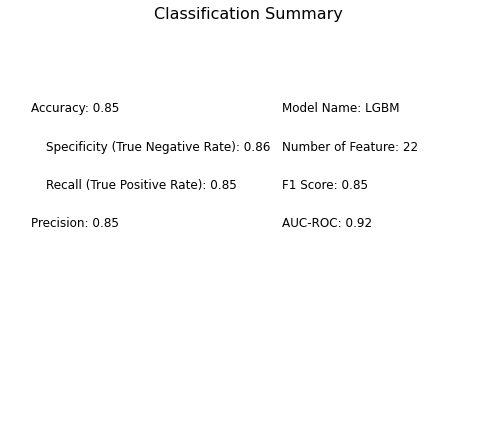

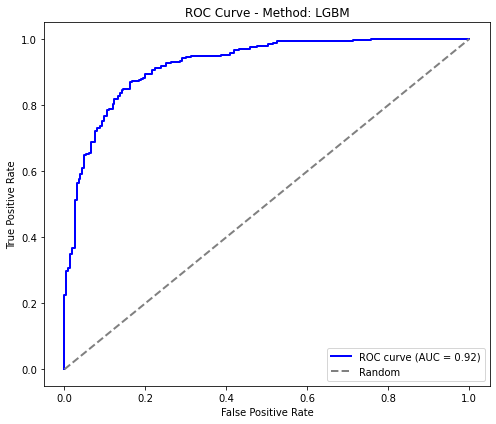

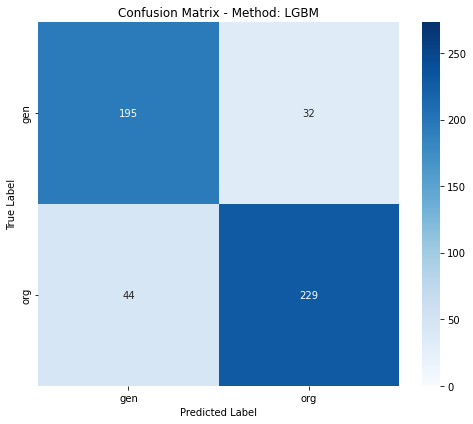

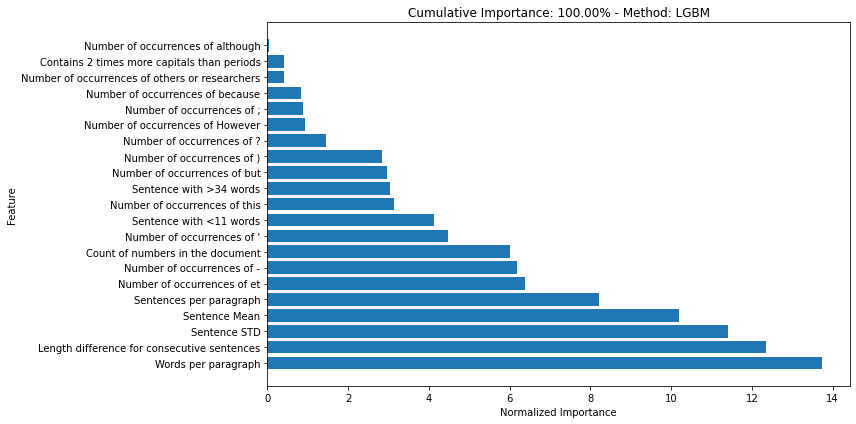

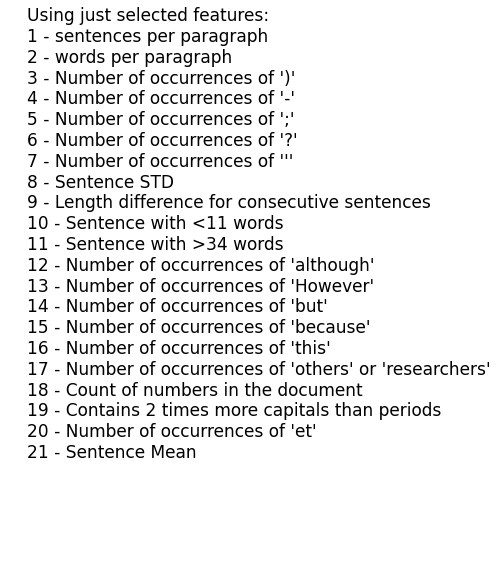

In [25]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Define the model
lgbm_classifier = LGBMClassifier(max_depth=15,learning_rate=0.5,n_estimators=80)

# Train the model on the training set
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lgbm_classifier.predict(X_test)
y_prob = lgbm_classifier.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
importances = lgbm_classifier.feature_importances_
# Call analyze_model directly
analyze_model("LGBM", accuracy, importances, lgbm_classifier, X_test, y_test, RunName, display=True)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Percentage of true 'gen' instances: 45.40%
Percentage of predicted 'gen' instances: 47.80%


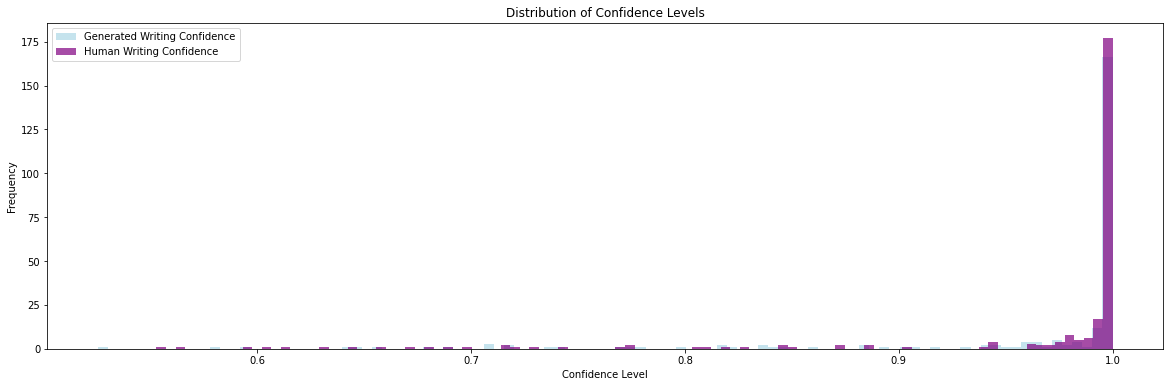

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming binary classification (two classes)
class_probabilities = lgbm_classifier.predict_proba(X_test)
y_pred_mlp = lgbm_classifier.predict(X_test)

# Initialize arrays for gen and org confidences
gen_confidence = []
org_confidence = []

# Initialize counters for true and predicted gen instances
true_gen_count = 0
predicted_gen_count = 0

# Compare probabilities and populate gen_confidence and org_confidence arrays
for i, probabilities in enumerate(class_probabilities):
    # Check if the true class is 'gen'
    if y_test[i] == 'gen':
        true_gen_count += 1
    # Check if the predicted class is 'gen'
    if y_pred_mlp[i] == 'gen':
        predicted_gen_count += 1
    if probabilities[0] > probabilities[1]:
        gen_confidence.append(probabilities[0])
    else:
        org_confidence.append(probabilities[1])


# Calculate percentages
total_instances = len(y_test)
true_gen_percentage = (true_gen_count / total_instances) * 100
predicted_gen_percentage = (predicted_gen_count / total_instances) * 100

# Print percentages
print(f"Percentage of true 'gen' instances: {true_gen_percentage:.2f}%")
print(f"Percentage of predicted 'gen' instances: {predicted_gen_percentage:.2f}%")

# Plot histograms for gen_confidence and org_confidence
num_bins = 100
plt.figure(figsize=(20, 6))
plt.hist(gen_confidence, bins=num_bins, color='lightblue', alpha=0.7, label='Generated Writing Confidence')
plt.hist(org_confidence, bins=num_bins, color='purple', alpha=0.7, label='Human Writing Confidence')

plt.xlabel('Confidence Level')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence Levels')
plt.legend()
plt.show()


[LightGBM] [Info] Number of positive: 582, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Info] Number of positive: 583, number of negative: 618
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 1201, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485429 -> initscore=-0.058301
[LightGBM] [Info] Start training from score -0.058301
[LightGBM] [Info] Numb

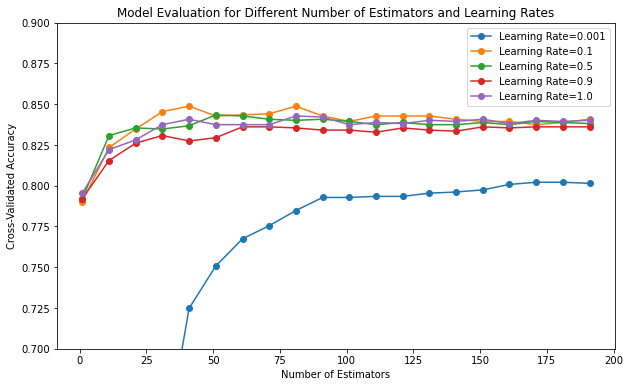

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Define different values for n_estimators
n_estimators_values = np.arange(1, 201, 10)

# Define different values for learning_rate
learning_rate_values = [0.001,0.1,0.5,0.9,1.0]

# Dictionary to store cross-validated accuracy scores for each learning_rate value
cv_scores_dict = {}

# Perform cross-validation for each combination of n_estimators and learning_rate
for learning_rate in learning_rate_values:
    cv_scores = []
    max_depths_all_estimators = []  # List to store learning_rate of each tree when learning_rate is None
    for n_estimators in n_estimators_values:
        lgbm_classifier = LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators)
        scores = cross_val_score(lgbm_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
        
    cv_scores_dict[learning_rate] = cv_scores
    
# Plot the results for each learning_rate value
plt.figure(figsize=(10, 6))
for learning_rate, scores in cv_scores_dict.items():
    plt.plot(n_estimators_values, scores, marker='o', linestyle='-', label=f'Learning Rate={learning_rate}')
plt.ylim(top=0.9, bottom=0.7)
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Model Evaluation for Different Number of Estimators and Learning Rates')
plt.legend()
plt.show()


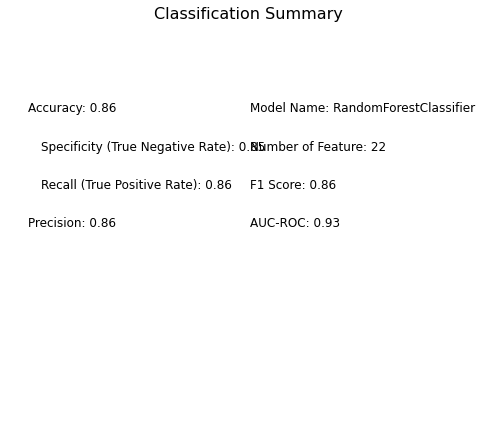

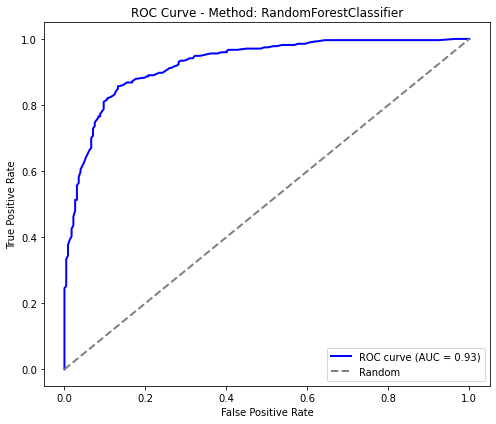

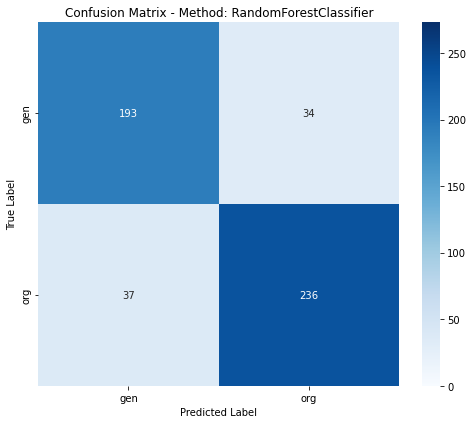

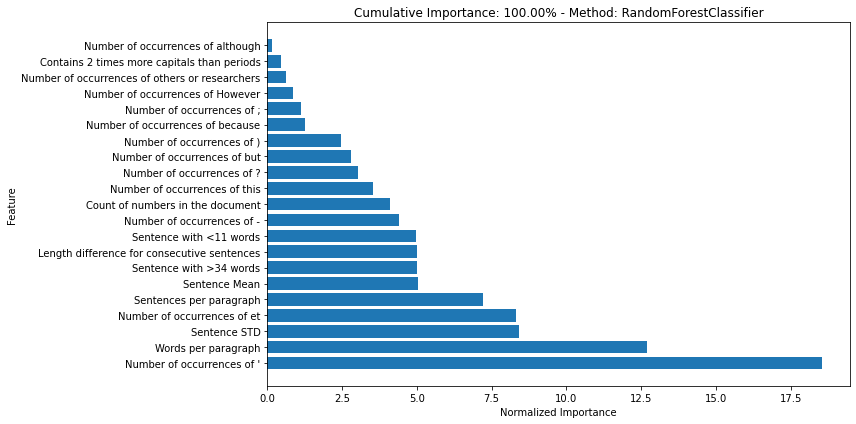

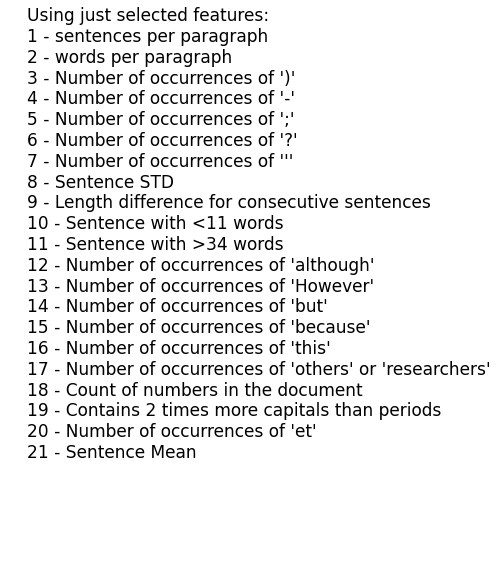

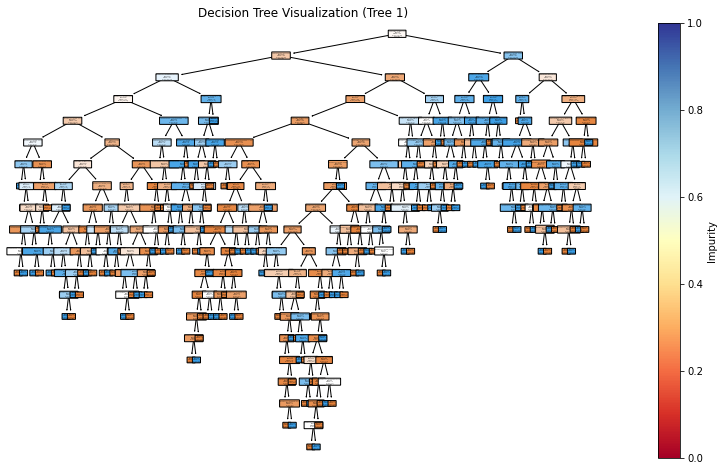

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

# Define the model (RandomForestClassifier)
rf_classifier = RandomForestClassifier(max_depth=None, n_estimators=170)

# Train the model on the training set
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test_imputed)
y_prob_rf = rf_classifier.predict_proba(X_test_imputed)[:, 1]

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
importances_rf = rf_classifier.feature_importances_
# Call analyze_model directly
analyze_model("RandomForestClassifier", accuracy_rf, importances_rf, rf_classifier, X_test_imputed, y_test, RunName, display=True)

# Choose the tree index to visualize (you can change this index)
tree_index = 0

# Access a specific tree from the RandomForestClassifier
tree_estimator = rf_classifier.estimators_[tree_index]

# Plot the tree with a color bar indicating impurity levels
feature_names = vectorizer.get_feature_names_out()
plt.figure(figsize=(12, 8))
plot_tree(tree_estimator, filled=True, feature_names=feature_names, class_names=rf_classifier.classes_, rounded=True)

# Add a dummy scatter plot for the colorbar
# You can customize the values and appearance of the dummy scatter plot as needed
dummy_scatter = plt.scatter([], [], c=[], cmap=plt.cm.RdYlBu, vmin=0, vmax=1)
plt.colorbar(dummy_scatter, label='Impurity', orientation='vertical', fraction=0.04, pad=0.1)

plt.title(f'Decision Tree Visualization (Tree {tree_index + 1})')
plt.show()

Max depths of all trees for n_estimators values are: [21, 19, 20, 20, 22, 21, 21, 22, 23, 25, 21, 20, 21, 23, 22, 21, 20, 21, 21, 23]


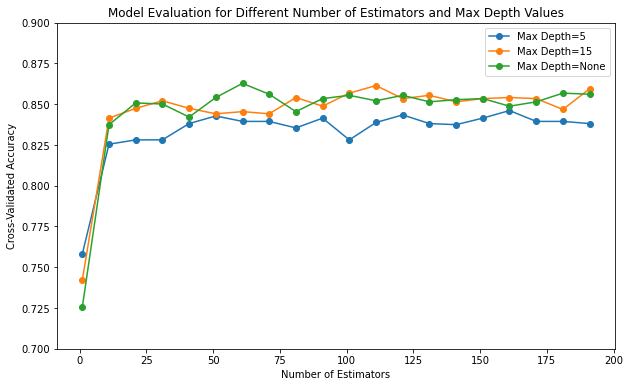

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define different values for n_estimators
n_estimators_values = np.arange(1, 201, 10)

# Define different values for max_depth
max_depth_values = [5, 15, None]

# Dictionary to store cross-validated accuracy scores for each max_depth value
cv_scores_dict = {}

# Perform cross-validation for each combination of n_estimators and max_depth
for max_depth in max_depth_values:
    cv_scores = []
    max_depths_all_estimators = []  # List to store max_depth of each tree when max_depth is None
    for n_estimators in n_estimators_values:
        rf_classifier = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
        scores = cross_val_score(rf_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
        
        if max_depth is None:
            # If max_depth is None, store the max_depth of each tree
            rf_classifier.fit(X_train_imputed, y_train)
            max_depths_all_estimators.append(np.max([estimator.tree_.max_depth for estimator in rf_classifier.estimators_]))

    cv_scores_dict[max_depth] = cv_scores
    
    if max_depth is None:
        print(f"Max depths of all trees for n_estimators values are: {max_depths_all_estimators}")

# Plot the results for each max_depth value
plt.figure(figsize=(10, 6))
for max_depth, scores in cv_scores_dict.items():
    plt.plot(n_estimators_values, scores, marker='o', linestyle='-', label=f'Max Depth={max_depth}')
plt.ylim(top=0.9, bottom=0.7)
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Model Evaluation for Different Number of Estimators and Max Depth Values')
plt.legend()
plt.show()


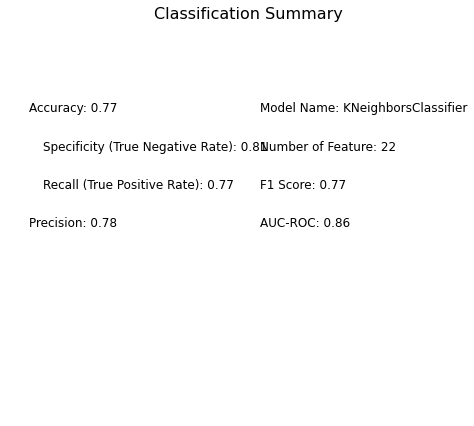

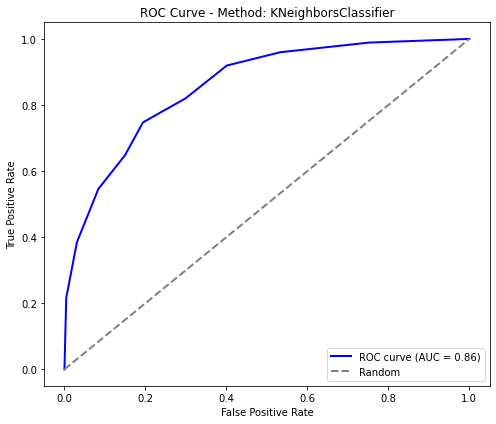

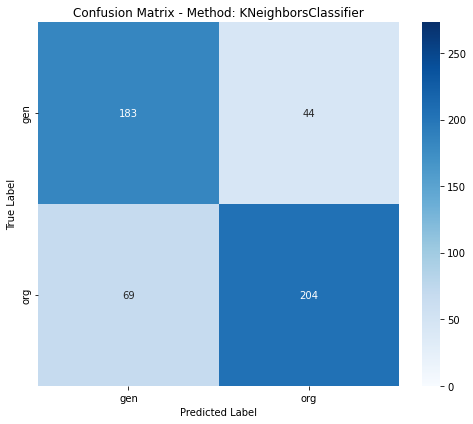

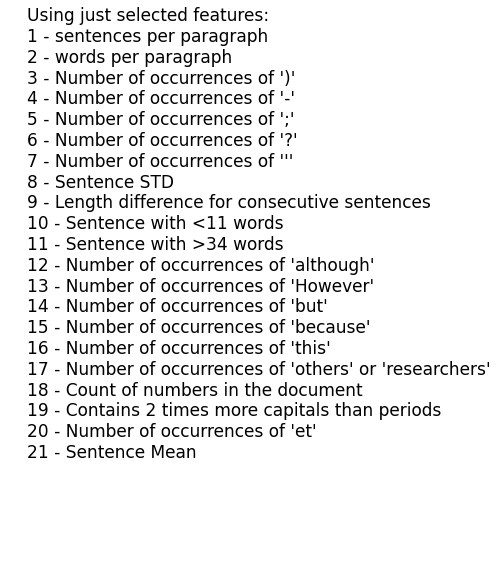

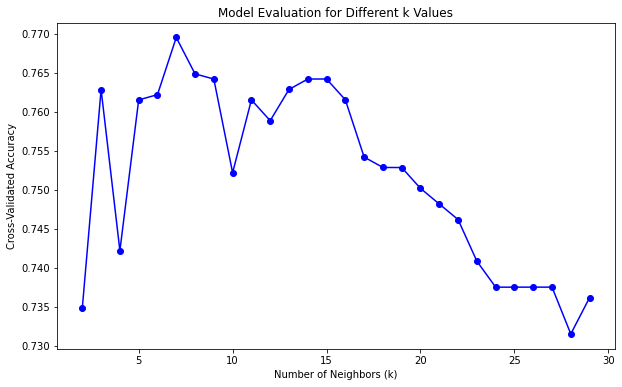

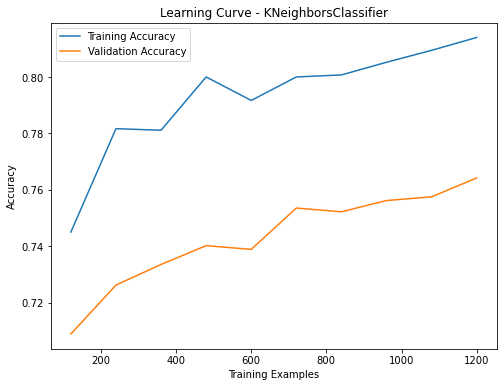

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

# Define the model (RandomForestClassifier)
KN_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the model on the training set
KN_classifier.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred_rf = KN_classifier.predict(X_test_imputed)
y_prob_rf = KN_classifier.predict_proba(X_test_imputed)[:, 1]

# Calculate accuracy
accuracy_KN = accuracy_score(y_test, y_pred_rf)
#importances_KN = result_KN.importances_mean
#print(importances_KN)
# Call analyze_model directly
analyze_model("KNeighborsClassifier", accuracy_KN, None, KN_classifier, X_test_imputed, y_test, RunName, display=True)

# Show for difrent values of K
k_values = np.arange(2, 30, 1)
cv_scores = []

for k in k_values:
    kn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kn_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Model Evaluation for Different k Values')
plt.show()

# Show Learning Curve
train_sizes_kn, train_scores_kn, test_scores_kn = learning_curve(
    KN_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_kn, np.mean(train_scores_kn, axis=1), label='Training Accuracy')
plt.plot(train_sizes_kn, np.mean(test_scores_kn, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - KNeighborsClassifier')
plt.legend()
plt.show()




Feature Importance (Weights) for Input Layer


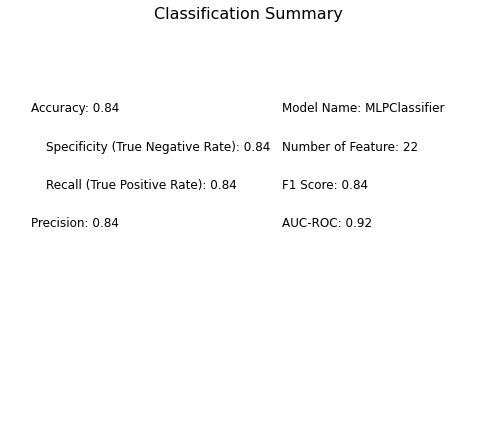

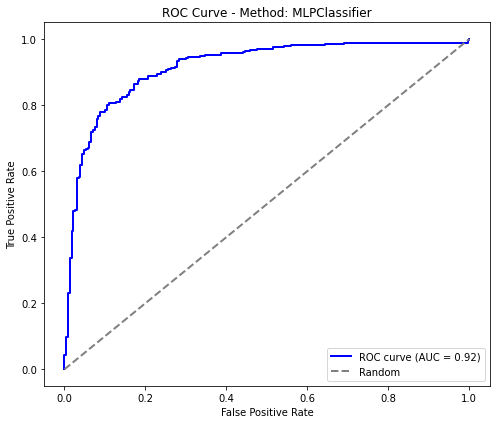

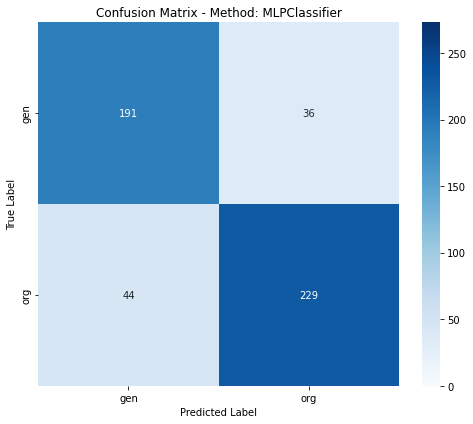

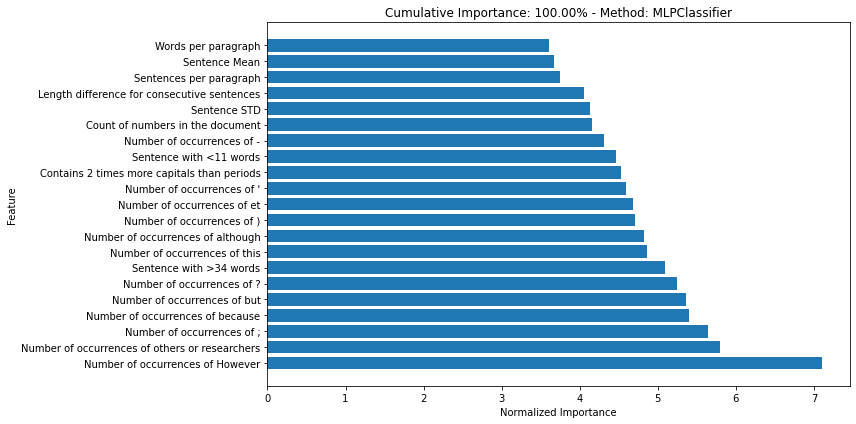

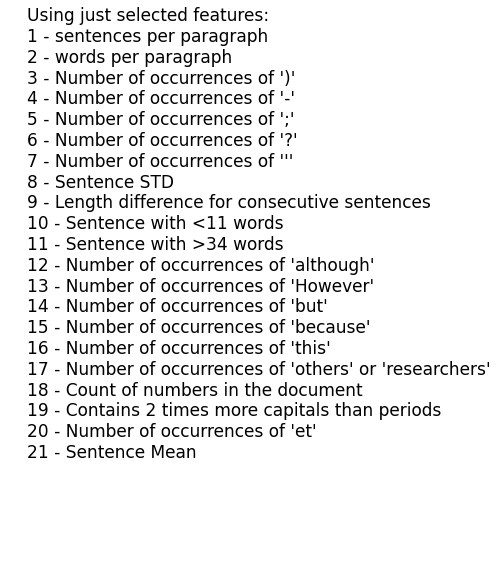

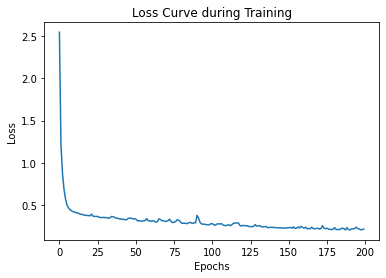

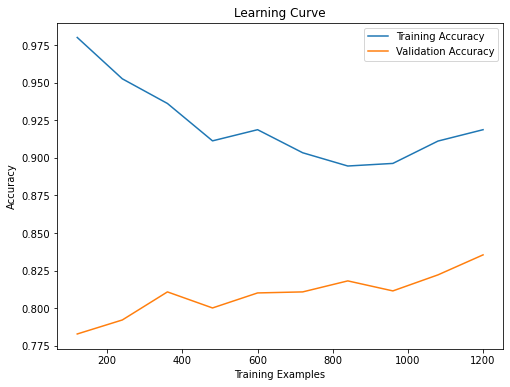

In [21]:
from sklearn.neural_network import MLPClassifier
from scipy.optimize import approx_fprime
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

# Define hyperparameters
alpha = 0.01
hidden_layer_sizes = (185,)

# Create MLPClassifier with specified hyperparameters
mlp_classifier = MLPClassifier(
    alpha=alpha,
    hidden_layer_sizes=hidden_layer_sizes
)

# Train the model on the training set
mlp_classifier.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred_mlp = mlp_classifier.predict(X_test_imputed)
y_prob_mlp = mlp_classifier.predict_proba(X_test_imputed)[:, 1]

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
# Assuming mlp_classifier is already trained
feature_importances = np.abs(mlp_classifier.coefs_[0])
average_importance = np.mean(feature_importances, axis=1)
print('Feature Importance (Weights) for Input Layer')

# Call analyze_model directly
analyze_model("MLPClassifier", accuracy_mlp, average_importance, mlp_classifier, X_test_imputed, y_test, RunName, display=True)

# Loss Curve
plt.plot(mlp_classifier.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve during Training')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    mlp_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()



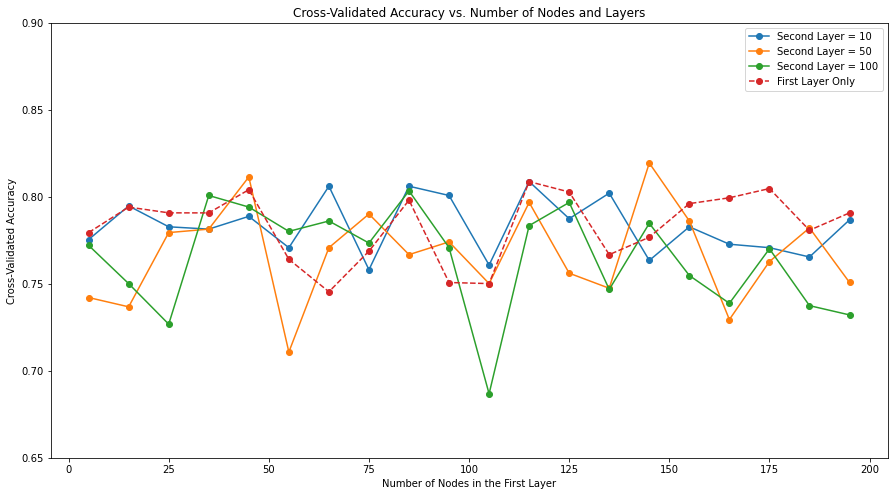

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameter values for the number of nodes in the first and second layers
hidden_layer_nodes = [(x, z) for x in np.arange(5, 201, 10) for z in [10, 50, 100]]

# Include configurations with only the first layer
hidden_layer_nodes_first_only = [(x,) for x in np.arange(5, 201, 10)]

# Combine both sets of configurations
all_hidden_layer_nodes = hidden_layer_nodes + hidden_layer_nodes_first_only

# List to store cross-validated accuracies
cv_accuracies = []
plt.figure(figsize=(15, 8))

# Loop over different configurations of nodes in the first and second layers
for nodes in all_hidden_layer_nodes:
    # Create MLPClassifier with specified hyperparameters
    mlp_classifier = MLPClassifier(
        alpha=alpha,
        hidden_layer_sizes=nodes,
        random_state=42  # Add a random state for reproducibility
    )

    # Perform cross-validation and calculate mean accuracy
    cv_accuracy = cross_val_score(mlp_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy').mean()
    cv_accuracies.append(cv_accuracy)

# Plotting with different colors for each z value and a new line for the first layer only
for z in [10, 50, 100]:
    z_accuracies = [acc for nodes, acc in zip(all_hidden_layer_nodes, cv_accuracies) if len(nodes) == 2 and nodes[1] == z]
    plt.plot([nodes[0] for nodes in all_hidden_layer_nodes if len(nodes) == 2 and nodes[1] == z], z_accuracies, marker='o', label=f'Second Layer = {z}')

# Plotting a new line for the first layer only
first_layer_accuracies = [acc for nodes, acc in zip(all_hidden_layer_nodes, cv_accuracies) if len(nodes) == 1]
plt.plot([nodes[0] for nodes in all_hidden_layer_nodes if len(nodes) == 1], first_layer_accuracies, marker='o', label='First Layer Only', linestyle='--')

plt.ylim(top=0.9, bottom=0.65)
plt.xlabel('Number of Nodes in the First Layer')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. Number of Nodes and Layers')
plt.legend()
plt.show()


In [23]:
if(1==0):
    import numpy as np
    import matplotlib.pyplot as plt
    from lightgbm import LGBMClassifier
    from sklearn.model_selection import cross_val_score

    # Generate synthetic data (replace this with your actual data)
    X_train_imputed = np.random.rand(100, 10)
    y_train = np.random.randint(0, 2, 100)

    # Define different values for the parameters
    colsample_bytree_values = [0.6, 0.7, 0.8, 0.9, 1.0]
    subsample_values = [0.6, 0.7, 0.8, 0.9, 1.0]
    n_estimators_values = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    learning_rate_values = [0.01, 0.05, 0.1, 0.2, 0.5]

    # Create subplots for each parameter
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    fig.suptitle('Impact of Parameters on Accuracy - LGBMClassifier')

    # Iterate over colsample_bytree values
    for colsample_bytree in colsample_bytree_values:
        cv_scores = []
        for n_estimators in n_estimators_values:
            # Create LGBMClassifier with current parameter values
            lgbm_classifier = LGBMClassifier(colsample_bytree=colsample_bytree, n_estimators=n_estimators)
            scores = cross_val_score(lgbm_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy')
            cv_scores.append(scores.mean())
        
        # Plot the results for colsample_bytree
        axes[0, 0].plot(n_estimators_values, cv_scores, marker='o', label=f'colsample_bytree={colsample_bytree}')

    axes[0, 0].set_xlabel('Number of Estimators (n_estimators)')
    axes[0, 0].set_ylabel('Cross-Validated Accuracy')
    axes[0, 0].set_title('Impact of colsample_bytree on Accuracy')
    axes[0, 0].legend()

    # Iterate over subsample values
    for subsample in subsample_values:
        cv_scores = []
        for n_estimators in n_estimators_values:
            # Create LGBMClassifier with current parameter values
            lgbm_classifier = LGBMClassifier(subsample=subsample, n_estimators=n_estimators)
            scores = cross_val_score(lgbm_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy')
            cv_scores.append(scores.mean())
        
        # Plot the results for subsample
        axes[0, 1].plot(n_estimators_values, cv_scores, marker='o', label=f'subsample={subsample}')

    axes[0, 1].set_xlabel('Number of Estimators (n_estimators)')
    axes[0, 1].set_ylabel('Cross-Validated Accuracy')
    axes[0, 1].set_title('Impact of subsample on Accuracy')
    axes[0, 1].legend()

    # Iterate over learning_rate values
    for learning_rate in learning_rate_values:
        cv_scores = []
        for n_estimators in n_estimators_values:
            # Create LGBMClassifier with current parameter values
            lgbm_classifier = LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators)
            scores = cross_val_score(lgbm_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy')
            cv_scores.append(scores.mean())
        
        # Plot the results for learning_rate
        axes[1, 0].plot(n_estimators_values, cv_scores, marker='o', label=f'learning_rate={learning_rate}')

    axes[1, 0].set_xlabel('Number of Estimators (n_estimators)')
    axes[1, 0].set_ylabel('Cross-Validated Accuracy')
    axes[1, 0].set_title('Impact of learning_rate on Accuracy')
    axes[1, 0].legend()

    # Plot the results for n_estimators
    cv_scores = []
    for n_estimators in n_estimators_values:
        lgbm_classifier = LGBMClassifier(n_estimators=n_estimators)
        scores = cross_val_score(lgbm_classifier, X_train_imputed, y_train, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())

    axes[1, 1].plot(n_estimators_values, cv_scores, marker='o', linestyle='-', color='blue')
    axes[1, 1].set_xlabel('Number of Estimators (n_estimators)')
    axes[1, 1].set_ylabel('Cross-Validated Accuracy')
    axes[1, 1].set_title('Model Evaluation for Different n_estimators Values')
    plt.tight_layout()
    plt.show()


In [42]:
import shap
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Controls
SingleControl = [0,0,0] # Print Document, Plot Shapely Values, Plot Fechure Values
AllControl = [1,0,0]    # Single Shapely, Maltiple Shapely, All Shapely
num = 4                 # How many to use in single Shapely
if(AllControl[0]==1):
    def generate_shap_summary_plot(model, X_test, vectorizer, index, max_display_features=5,strType = "Type", custom_title="Title", num_variables_to_plot=5,contr = [0,1,0]):
        # Convert the sparse matrix to a pandas DataFrame
        X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

        # Choose a specific data point for analysis
        data_point = X_test_df.iloc[index]
        if(contr[0]==1):
            print(custom_title)
            print("---------------")
            document_for_index = documents[-(len(featuresets) - Trainn) + index][0]
            print("Document:", document_for_index)
        if(contr[1]==1):
            # Explain the model's predictions using Shapley values
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(data_point.values.reshape(1, -1))  # Reshape to 2D array

            # Check the number of classes in shap_values
            num_classes = len(shap_values)

            # Use the correct index for the class of interest (0 or 1)
            shap_values_class_1 = shap_values[1] if num_classes > 1 else shap_values[0]

            # Convert data_point to a 2D array
            data_point_2d = data_point.values.reshape(1, -1)

            # Determine the number of features to display
            if num_variables_to_plot == 0:
                num_variables_to_plot = X_test_df.shape[1]
                color_bar = True
            else:
                color_bar = False

            # Use shap.summary_plot with features as a 2D array
            shap.summary_plot(shap_values_class_1, features=data_point_2d, feature_names=vectorizer.get_feature_names_out(),
                            max_display=num_variables_to_plot, color_bar=color_bar, show=False)  # Set show=False to prevent automatic display

            # Add a title to the plot using Matplotlib
            class_label = model.predict(data_point_2d)[0]
            plt.title(custom_title)
            plt.show()  # Display the plot
        if (contr[2]==1):
            # Set the size of the lollipop chart
            fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the values based on your preferred size

            # Create the lollipop plot
            lollipop = ax.stem(data_point.index, data_point.values, basefmt=' ', markerfmt='ro', linefmt='r-')

            ax.set_xlabel('Feature Names')
            ax.set_ylabel('Feature Values')
            ax.set_title('Lollipop Plot for Data Point')

            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

            # Add text labels above lollipop heads
            for i, txt in enumerate(data_point.values):
                ax.annotate(f'{txt:.2f}', (lollipop.markerline.get_xdata()[i], lollipop.markerline.get_ydata()[i]),
                            textcoords="offset points", xytext=(0, 5), ha='center')

            plt.show()


    model = lgbm_classifier
    # Set the number of top data points to select for each class
    shapNum = 10

    # Get predicted probabilities for each class
    class_probabilities = model.predict_proba(X_test)

    # Find the indices of the top 'num' data points for 'gen'
    org_indices = sorted(range(len(class_probabilities)), key=lambda i: class_probabilities[i, 1], reverse=True)[:num]

    # Find the indices of the top 'num' data points for 'org'
    gen_indices = sorted(range(len(class_probabilities)), key=lambda i: class_probabilities[i, 0], reverse=True)[:num]

    # Loop through 'gen' indices and generate Shapley summary plots
    for index in gen_indices:
        prob_gen = class_probabilities[index, 0]
        correct_classification = y_test[index] == 'gen'        
        title = f"Shapley Values for Generated Writing - Probability: {prob_gen:.4f}"
        generate_shap_summary_plot(model, X_test, vectorizer,strType = "Generated Writing", index=index, custom_title=title, num_variables_to_plot=shapNum, contr = SingleControl)
        print(" ")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(" ")
    # Loop through 'org' indices and generate Shapley summary plots
    for index in org_indices:
        prob_org = class_probabilities[index, 1]
        correct_classification = y_test[index] == 'org'
        title = f"Shapley Values for Orginal Writing - Probability: {prob_org:.4f}"
        generate_shap_summary_plot(model, X_test, vectorizer,strType = "Orginal Writing", index=index, custom_title=title, num_variables_to_plot=shapNum, contr = SingleControl)
        print(" ")
    #    Positive Shapley values push the model's output higher than the reference value.
    #    Negative Shapley values push the model's output lower than the reference value.

if(AllControl[1] == 1):
    def plot_shap_values_for_indices(model, X_test, vectorizer, indices, custom_title="Title"):
        # Convert the sparse matrix to a pandas DataFrame
        X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

        # Explain the model's predictions using Shapley values
        explainer = shap.TreeExplainer(model)
        
        # Get Shapley values for each index
        shap_values_list = [explainer.shap_values(X_test_df.iloc[index].values.reshape(1, -1))[1] for index in indices]

        # Concatenate Shapley values into a 2D array
        shap_values_array = np.concatenate(shap_values_list)

        # Extract feature names
        feature_names = vectorizer.get_feature_names_out()

        # Plot Shapley values as box and whisker plots
        plt.figure(figsize=(10, 6))
        plt.boxplot(shap_values_array, vert=False, labels=feature_names, patch_artist=True)

        plt.axvline(x=0, color='black', linestyle='--')  # Add a line at x=0
        plt.xlabel('Shapley Values')
        plt.title(custom_title)
        plt.show()

    # Assuming you have already defined these variables: lgbm_classifier, X_test, vectorizer, y_test

    # Set the number of top data points to select for each class
    num = 5
    shapNum = 10

    # Get predicted probabilities for each class
    class_probabilities = lgbm_classifier.predict_proba(X_test)

    # Find the indices of the top 'num' data points for 'gen'
    org_indices = sorted(range(len(class_probabilities)), key=lambda i: class_probabilities[i, 1], reverse=True)[:num]

    # Find the indices of the top 'num' data points for 'org'
    gen_indices = sorted(range(len(class_probabilities)), key=lambda i: class_probabilities[i, 0], reverse=True)[:num]

    # Generate box and whisker plots for Shapley values
    title = "Box and Whisker Plots for 'gen' Shapley Values"
    plot_shap_values_for_indices(lgbm_classifier, X_test, vectorizer, gen_indices, custom_title=title)
    # Generate box and whisker plots for Shapley values
    title = "Box and Whisker Plots for 'org' Shapley Values"
    plot_shap_values_for_indices(lgbm_classifier, X_test, vectorizer, org_indices, custom_title=title)

if(AllControl[2] == 1):
    def plot_shap_values_for_indices(model, X_test, vectorizer, indices, color, custom_title="Title"):
        # Convert the sparse matrix to a pandas DataFrame
        X_test_df = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

        # Explain the model's predictions using Shapley values
        explainer = shap.TreeExplainer(model)
        
        # Get Shapley values for each index
        shap_values_list = [explainer.shap_values(X_test_df.iloc[index].values.reshape(1, -1))[1] for index in indices]

        # Concatenate Shapley values into a 2D array
        shap_values_array = np.concatenate(shap_values_list)

        # Extract feature names
        feature_names = vectorizer.get_feature_names_out()

        # Get feature importances
        importances = model.feature_importances_

        # Sort features based on importances
        sorted_indices = np.argsort(importances)[::-1]
        feature_names_sorted = [feature_names[i] for i in sorted_indices]
        shap_values_array_sorted = shap_values_array[:, sorted_indices]

        # Plot Shapley values as box and whisker plots with specified color
        plt.boxplot(shap_values_array_sorted, vert=False, labels=feature_names_sorted, patch_artist=True, boxprops=dict(facecolor=color, color=color, alpha=0.5),
                    flierprops=dict(markerfacecolor=color, marker=' ', markersize=8))

    # Assuming you have already defined these variables: lgbm_classifier, X_test, vectorizer, y_test

    # Set the number of top data points to select for each class
    num = 3
    shapNum = 0
    boolRev = True # dose not work yet: will change if it is worst or best objs

    # Get predicted probabilities for each class
    class_probabilities = lgbm_classifier.predict_proba(X_test)

    # Get the indices sorted by probability for both 'gen' and 'org'
    org_sorted_indices = np.argsort(class_probabilities[:, 1])
    gen_sorted_indices = np.argsort(class_probabilities[:, 0])

    if boolRev:
        # Find the top 'num' data points for 'gen' (highest probability)
        org_indices = org_sorted_indices[-num:][::-1]
        
        # Find the top 'num' data points for 'org' (highest probability)
        gen_indices = gen_sorted_indices[-num:][::-1]
    else:
        # Find the bottom 'num' data points for 'gen' (lowest probability)
        org_indices = org_sorted_indices[:num]
        
        # Find the bottom 'num' data points for 'org' (lowest probability)
        gen_indices = gen_sorted_indices[:num]



    # Generate box and whisker plots for Shapley values
    plt.figure(figsize=(10, 6))

    # Plot 'gen' Shapley values in orange
    plot_shap_values_for_indices(lgbm_classifier, X_test, vectorizer, gen_indices, color='red')

    # Plot 'org' Shapley values in red
    plot_shap_values_for_indices(lgbm_classifier, X_test, vectorizer, org_indices, color='blue')

    # Add a line at x=0
    plt.axvline(x=0, color='black', linestyle='--')

    # Add text annotations in the top right corner
    plt.text(0.95, 0.95, 'Generated', color='red', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.95, 0.9, 'Original', color='blue', transform=plt.gca().transAxes, ha='right', va='top')

    # Add a title
    if boolRev:
        plt.title(f"The Shapley Values for the Most Extreme {num} Writings for Generated and Original")
    else:
        plt.title(f"The Shapley Values for the Least Extreme {num} Writings for Generated and Original")


    plt.xlabel('Shapley Values')
    plt.show()



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
 
 
 
 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 
 
 
 
 
